In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
results = pd.read_csv('MOB_final_results.csv', index_col=0)
sample_info = pd.read_csv('MOB_sample_info.csv', index_col=0)

In [5]:
df = pd.read_csv('data/Rep11_MOB_0.csv', index_col=0)
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes
df = df.loc[sample_info.index]
dfm = np.log10(df + 1)

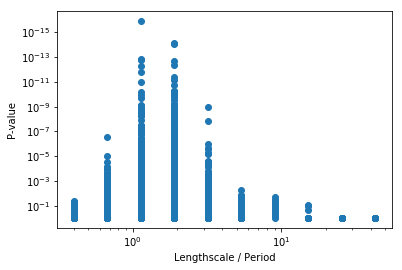

In [6]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

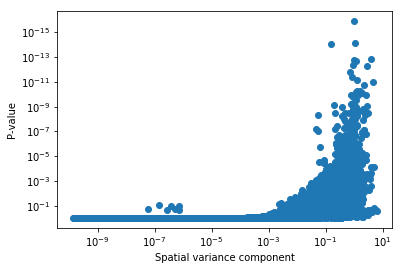

In [7]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

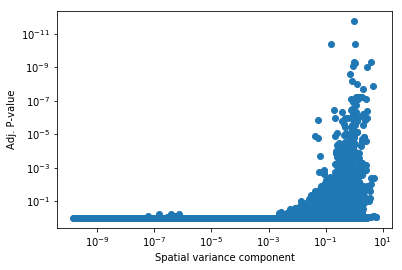

In [8]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Adj. P-value');

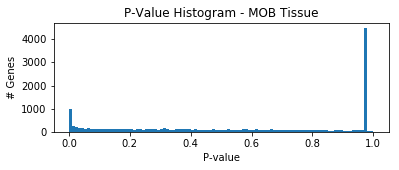

In [9]:
figsize(6, 2)
plt.hist(results.pval, bins=100);
plt.title('P-Value Histogram - MOB Tissue')
plt.ylabel('# Genes')
plt.xlabel('P-value');

plt.savefig('MOB-pvalue-hist.pdf')

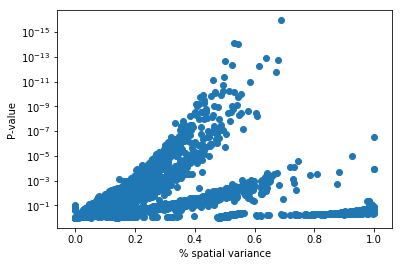

In [23]:
figsize(6, 4)
plt.yscale('log')
results['total_variance'] = results.max_delta * results.max_s2_t_hat + results.max_s2_t_hat

for i, g in results.groupby('model'):
    plt.scatter(g.max_s2_t_hat / g.total_variance, g.pval)
    

plt.gca().invert_yaxis();
plt.xlabel('% spatial variance')
plt.ylabel('P-value');

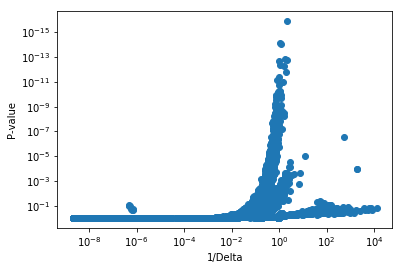

In [13]:
figsize(6, 4)
plt.yscale('log')
plt.xscale('log')

for i, g in results.groupby('model'):
    plt.scatter(1. / g.max_delta, g.pval)
    

plt.gca().invert_yaxis();
plt.xlabel('1/Delta')
plt.ylabel('P-value');

In [14]:
results.model.value_counts()

SE    14859
Name: model, dtype: int64

In [15]:
results.query('qval < 0.05').shape

(586, 16)

In [16]:
results.query('qval < 0.05').model.value_counts()

SE    586
Name: model, dtype: int64

In [17]:
N = 5
top_per_ls = results.query('qval < 0.05') \
    .sort_values('qval', ascending=True) \
    .groupby('l') \
    .head(N) \
    .sort_values(['l', 'qval'], ascending=[True, True])

top_per_ls

,g,max_delta,max_ll,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_null,D,pval,qval,total_variance
4257,Taf7l,0.001852,377.420192,0.803135,0.251863,261,0.000515,0.675535,4,SE,-732.582303,351.073923,26.346270,2.853695e-07,4.326843e-05,0.252329
4255,4933405L10Rik,0.078692,466.943282,0.818716,0.251266,261,0.001056,0.675535,4,SE,-911.628482,447.444558,19.498724,1.006669e-05,8.041988e-04,0.271038
3600,Naaa,0.344028,-18.381776,-0.045792,0.057310,261,0.000617,0.675535,4,SE,59.021633,-35.954422,17.572646,2.765377e-05,1.842634e-03,0.077027
1834,Oxct1,0.363615,-172.608223,-3.776507,4.952954,261,0.000516,0.675535,4,SE,367.474528,-188.363134,15.754911,7.210053e-05,4.058113e-03,6.753922
2021,Ank3,0.392272,-159.340460,-3.388719,3.963573,261,0.000513,0.675535,4,SE,340.939002,-175.040175,15.699715,7.423536e-05,4.146854e-03,5.518373
4544,Fabp7,0.455200,-140.584985,2.356659,0.963339,261,0.000620,1.135190,4,SE,303.428051,-209.595407,69.010423,1.110223e-16,1.649680e-12,1.401851
4314,Pcp4,0.570799,-175.410798,-5.191134,3.928051,261,0.000631,1.135190,4,SE,373.079678,-230.221635,54.810836,1.326717e-13,4.928420e-10,6.170180
5373,Cpe,0.472713,-63.326527,-2.533335,0.999660,261,0.000614,1.135190,4,SE,148.911136,-117.692576,54.366049,1.664224e-13,4.945742e-10,1.472212
5895,Nrgn,0.624388,-222.792428,-4.309162,2.819495,261,0.000631,1.135190,4,SE,467.842938,-274.890454,52.098026,5.280221e-13,9.807350e-10,4.579953
4651,Apod,0.487558,-213.820607,1.750076,0.731751,261,0.000620,1.135190,4,SE,449.899295,-263.751065,49.930458,1.592948e-12,2.629957e-09,1.088522


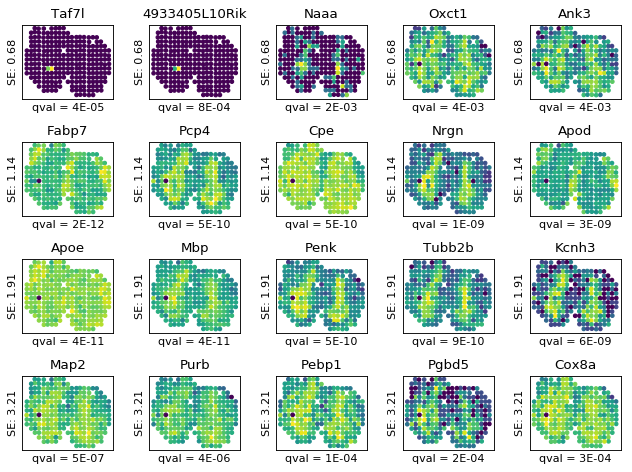

In [19]:
plt.figure(figsize=(8, 6), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby('l')):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        plt.subplot(N_rows, N, j * N + i + 1)
        plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=10, rasterized=True);
        plt.title(r['g'])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('qval = {:.0E}'.format(r['qval']))
        if True:
            plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))

plt.tight_layout()
plt.savefig('top_MOB_genes_per_ls.pdf')

In [20]:
from adjustText import adjust_text

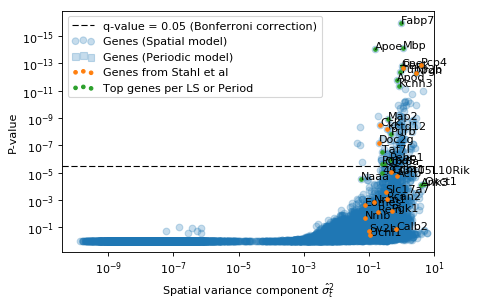

In [21]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('model == "SE"')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Spatial model)', marker='o', color='C0');

tmp = results.query('model == "PER"')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Periodic model)', marker='s', color='C0');


plt.xlim(None, 1e1)

tmp = results.query('g in ["Penk", "Doc2g", "Kctd12",' \
                        '"Actb", "Pgk1",' \
                        '"Nrsn1", "Cck",' \
                        '"Pcp4", "Nrgn",' \
                        '"Eomes", "Calb2",' \
                        '"Doc2g", "Slc17a7", "Reln", "Cdhr1", "Sv2b", "Shisa3"' \
                        '"Plcxd2", "Nmb", "Uchl1", "Rcan2"]')


plt.scatter(tmp['max_s2_t_hat'], tmp['pval'], s=10, zorder=10, label='Genes from Stahl et al', c='C1');
texts = []
for i in tmp.index.union(top_per_ls.index):
    if results.loc[i, 'max_s2_t_hat'] == 0.:
        continue

    texts.append(plt.text(results.loc[i, 'max_s2_t_hat'], results.loc[i, 'pval'], results.loc[i, 'g']))
    
# print(adjust_text(texts, arrowprops=dict(arrowstyle='-'),
#                          force_points=0.1,
#                          force_text=0.1,
#                          force_objects=0.1,
#                          zorder=20,
# #                          x=results['max_s2_t_hat'],
# #                          y=results['pval'],
#      ))

plt.scatter(top_per_ls['max_s2_t_hat'], top_per_ls['pval'], s=10, label='Top genes per LS or Period', c='C2');
    
plt.xlabel('Spatial variance component $\hat{\sigma}^2_t$');
plt.ylabel('P-value');
plt.gca().invert_yaxis()

plt.axhline(0.05 / results.shape[0], label='q-value = 0.05 (Bonferroni correction)', lw=1, linestyle='--', c='k')

plt.legend(scatterpoints=3)
plt.savefig('sigma_pval_MOB.pdf', bbox_inches='tight');

In [22]:
results.sort_values('qval', ascending=True).query('qval < 0.05').head(20)

,g,max_delta,max_ll,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_null,D,pval,qval,total_variance
4544,Fabp7,0.455200,-140.584985,2.356659,0.963339,261,0.000620,1.135190,4,SE,303.428051,-209.595407,69.010423,1.110223e-16,1.649680e-12,1.401851
11307,Mbp,0.878056,-129.011480,-4.015546,1.075183,261,0.000525,1.907609,4,SE,280.281042,-189.517673,60.506193,7.327472e-15,4.234180e-11,2.019254
10528,Apoe,0.840230,-38.628187,1.202798,0.151907,261,0.000524,1.907609,4,SE,99.514456,-98.822963,60.194776,8.548717e-15,4.234180e-11,0.279545
4314,Pcp4,0.570799,-175.410798,-5.191134,3.928051,261,0.000631,1.135190,4,SE,373.079678,-230.221635,54.810836,1.326717e-13,4.928420e-10,6.170180
5373,Cpe,0.472713,-63.326527,-2.533335,0.999660,261,0.000614,1.135190,4,SE,148.911136,-117.692576,54.366049,1.664224e-13,4.945742e-10,1.472212
10159,Penk,1.001025,-177.505718,-4.055031,1.120976,261,0.000423,1.907609,4,SE,377.269518,-231.416604,53.910886,2.098322e-13,5.196493e-10,2.243100
10568,Tubb2b,0.903978,-173.905125,-3.486106,0.888540,261,0.000519,1.907609,4,SE,370.068332,-226.448973,52.543848,4.207745e-13,8.931841e-10,1.691761
5895,Nrgn,0.624388,-222.792428,-4.309162,2.819495,261,0.000631,1.135190,4,SE,467.842938,-274.890454,52.098026,5.280221e-13,9.807350e-10,4.579953
4651,Apod,0.487558,-213.820607,1.750076,0.731751,261,0.000620,1.135190,4,SE,449.899295,-263.751065,49.930458,1.592948e-12,2.629957e-09,1.088522
10189,Kcnh3,1.011898,-190.575955,-3.334693,0.827354,261,0.000426,1.907609,4,SE,403.409991,-238.575816,47.999861,4.262479e-12,6.333618e-09,1.664551
